In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly

import plotly.express as px
from plotly.offline import plot

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, LSTM, GRU

In [2]:
doge = pd.read_csv('https://raw.githubusercontent.com/benvictoria17/Finance/master/dataset/Dogecoin%20(%20cryptocurrency%20)%20Dataset/DOGE-USD.csv')
doge

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-08-24,0.001731,0.001845,0.001722,0.001816,0.001816,4.796720e+06
1,2017-08-25,0.001808,0.001830,0.001762,0.001790,0.001790,2.654040e+06
2,2017-08-26,0.001787,0.001797,0.001735,0.001778,0.001778,1.935350e+06
3,2017-08-27,0.001779,0.001784,0.001745,0.001760,0.001760,2.241620e+06
4,2017-08-28,0.001764,0.001825,0.001751,0.001825,0.001825,3.210440e+06
...,...,...,...,...,...,...,...
1457,2021-08-20,0.317571,0.333223,0.314142,0.327491,0.327491,3.512291e+09
1458,2021-08-21,0.327395,0.329356,0.315433,0.316797,0.316797,2.600397e+09
1459,2021-08-22,0.317085,0.321541,0.306546,0.314963,0.314963,2.237836e+09
1460,2021-08-23,0.314926,0.328094,0.313368,0.317914,0.317914,2.836629e+09


In [3]:
doge.sort_values(by='Date', ascending=False, inplace=True)
doge.reset_index(drop=True, inplace=True)
doge

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-08-24,0.317984,0.319460,0.311619,0.312391,0.312391,2.088121e+09
1,2021-08-23,0.314926,0.328094,0.313368,0.317914,0.317914,2.836629e+09
2,2021-08-22,0.317085,0.321541,0.306546,0.314963,0.314963,2.237836e+09
3,2021-08-21,0.327395,0.329356,0.315433,0.316797,0.316797,2.600397e+09
4,2021-08-20,0.317571,0.333223,0.314142,0.327491,0.327491,3.512291e+09
...,...,...,...,...,...,...,...
1457,2017-08-28,0.001764,0.001825,0.001751,0.001825,0.001825,3.210440e+06
1458,2017-08-27,0.001779,0.001784,0.001745,0.001760,0.001760,2.241620e+06
1459,2017-08-26,0.001787,0.001797,0.001735,0.001778,0.001778,1.935350e+06
1460,2017-08-25,0.001808,0.001830,0.001762,0.001790,0.001790,2.654040e+06


In [4]:
doge.isnull().sum()

Date         0
Open         4
High         4
Low          4
Close        4
Adj Close    4
Volume       4
dtype: int64

In [5]:
doge.fillna(doge.median(), inplace=True)
columns = ['Open', 'High', 'Low', 'Close', 'Volume']
for column in columns:
    scaler = MinMaxScaler()
    scaler = scaler.fit(doge[columns])
    doge[columns] = scaler.transform(doge[columns])
doge

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-08-24,0.461723,0.432524,0.511887,0.455594,0.312391,0.030069
1,2021-08-23,0.457272,0.444243,0.514766,0.463668,0.317914,0.040853
2,2021-08-22,0.460415,0.435349,0.503537,0.459354,0.314963,0.032226
3,2021-08-21,0.475421,0.445956,0.518165,0.462035,0.316797,0.037449
4,2021-08-20,0.461122,0.451204,0.516040,0.477669,0.327491,0.050587
...,...,...,...,...,...,...,...
1457,2017-08-28,0.001458,0.001414,0.001852,0.001564,0.001825,0.000031
1458,2017-08-27,0.001480,0.001359,0.001842,0.001469,0.001760,0.000017
1459,2017-08-26,0.001492,0.001376,0.001825,0.001496,0.001778,0.000012
1460,2017-08-25,0.001522,0.001421,0.001870,0.001513,0.001790,0.000023


In [6]:
def make_dataset(data, label, window_size=20):
    feature_list = []
    label_list = []
    for i in range(len(data) - window_size):
        feature_list.append(np.array(data.iloc[i:i+window_size]))
        label_list.append(np.array(label.iloc[i+window_size]))
    return np.array(feature_list), np.array(label_list)
train_feature = doge[['Open', 'High', 'Low', 'Close', 'Volume']]
train_label = doge['Adj Close']
train_feature, train_label = make_dataset(train_feature, train_label, 10)
X = train_feature
y = train_label
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=11)

In [7]:
model = Sequential()
model.add(SimpleRNN(20, activation='relu', input_shape=X_train.shape[1:]))
model.add(Dense(1))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, 20)                520       
_________________________________________________________________
dense (Dense)                (None, 1)                 21        
Total params: 541
Trainable params: 541
Non-trainable params: 0
_________________________________________________________________


2022-02-15 23:30:44.553751: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [8]:
model.compile(loss='mse', optimizer='adam', metrics=['mse'])
history = model.fit(X_train, y_train, batch_size=80, epochs=100, validation_data=(X_val, y_val))

Epoch 1/100


2022-02-15 23:30:44.818486: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


12/12 [==============================] - 2s 32ms/step - loss: 3.0906e-04 - mse: 3.0906e-04 - val_loss: 2.1554e-04 - val_mse: 2.1554e-04
Epoch 2/100
12/12 [==============================] - 0s 7ms/step - loss: 2.1937e-04 - mse: 2.1937e-04 - val_loss: 1.7331e-04 - val_mse: 1.7331e-04
Epoch 3/100
12/12 [==============================] - 0s 7ms/step - loss: 1.8734e-04 - mse: 1.8734e-04 - val_loss: 1.3504e-04 - val_mse: 1.3504e-04
Epoch 4/100
12/12 [==============================] - 0s 7ms/step - loss: 1.5570e-04 - mse: 1.5570e-04 - val_loss: 1.3419e-04 - val_mse: 1.3419e-04
Epoch 5/100
12/12 [==============================] - 0s 7ms/step - loss: 1.5614e-04 - mse: 1.5614e-04 - val_loss: 1.2707e-04 - val_mse: 1.2707e-04
Epoch 6/100
12/12 [==============================] - 0s 7ms/step - loss: 1.3809e-04 - mse: 1.3809e-04 - val_loss: 1.1713e-04 - val_mse: 1.1713e-04
Epoch 7/100
12/12 [==============================] - 0s 8ms/step - loss: 1.3445e-04 - mse: 1.3445e-04 - val_loss: 1.2739e-04 - va

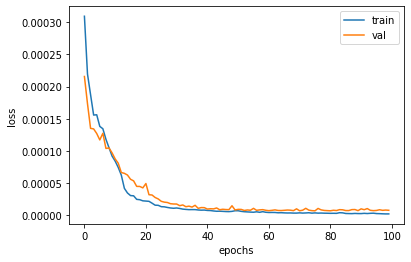

In [9]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [10]:
from sklearn.metrics import mean_squared_error

train_pred = model.predict(X_train)
train_rmse = np.sqrt(mean_squared_error(y_train, train_pred))

test_pred = model.predict(X_test)
test_rmse = np.sqrt(mean_squared_error(y_test, test_pred))

print(f"Train RMSE: {train_rmse.round(2)}")
print(f"Test RMSE: {test_rmse.round(2)}")

Train RMSE: 0.0
Test RMSE: 0.0


In [11]:

import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Scatter(x=np.arange(len(y_test)), y=y_test.ravel(),
                    mode='lines',
                    name='test'))
fig.add_trace(go.Scatter(x=np.arange(len(y_test)), y=test_pred.ravel(),
                    line=dict(dash='dash', width=3),
                    name='pred'))

fig.update_layout(
    title="Adj Close Prediction of DogeCoin",
    height=500)
fig.show()